#Balance in machine learning

This problem refers to the issue of imbalanced distribution of classes in a dataset used for training a machine learning model. 

In a typical binary classification problem, the ideal scenario is to have an equal distribution of positive and negative examples, i.e., balanced classes, in the training dataset. However, in real-world scenarios, it is common to encounter datasets where the classes are not evenly distributed, resulting in an imbalanced class distribution.

For example, in a medical diagnosis problem where the goal is to predict whether a patient has a rare disease, the number of positive cases (patients with the disease) may be significantly lower than the number of negative cases (patients without the disease) in the dataset. Similarly, in fraud detection, the number of fraudulent transactions may be relatively low compared to the number of legitimate transactions. This can also happen in other domains such as customer churn prediction, anomaly detection, and rare event prediction.

The problem with imbalanced classes is that it can lead to biased model performance. When a model is trained on imbalanced data, it tends to be biased towards the majority class, as it has more samples to learn from. As a result, the model may have lower accuracy, precision, recall, or F1-score for the minority class, which is the class of interest. In such cases, the model may perform well on the majority class but poorly on the minority class, leading to a skewed or suboptimal model performance.

Imbalanced classes can also affect the model's ability to generalize to new data. A model that is biased towards the majority class may not perform well on unseen data with imbalanced class distribution, leading to poor real-world performance. Therefore, addressing the problem of imbalanced classes is crucial to building accurate and robust machine learning models.



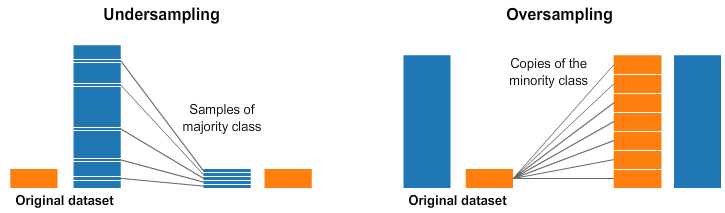

##Dealing with imbalanced datasets

There are several techniques to mitigate the issue of imbalanced classes, including:

##Resampling Techniques: 
This involves oversampling the minority class or undersampling the majority class to balance the class distribution in the training dataset. Common methods include random oversampling, random undersampling, and SMOTE (Synthetic Minority Over-sampling Technique).

##Algorithmic Techniques: 
Some machine learning algorithms allow for class weights to be assigned during model training. By assigning higher weights to the minority class during training, the model can be biased towards learning the minority class.

##Ensemble Methods: 
Ensemble techniques, such as bagging and boosting, can be used to improve the model's performance on minority class samples by combining the predictions of multiple base models.

##Evaluation Metrics: 
Carefully selecting appropriate evaluation metrics, such as precision, recall, F1-score, or area under the Receiver Operating Characteristic (ROC) curve, can provide a more balanced and informative assessment of model performance when dealing with imbalanced classes.

##Data Collection: 
Collecting more data for the minority class, if possible, can help improve the class balance in the dataset and mitigate the problem of imbalanced classes.


##Example

We will be using the Breast Cancer Wisconsin (Diagnostic) dataset, which is a commonly used dataset for breast cancer classification.
The Wisconsin Breast Cancer (Diagnostic) dataset is often considered imbalanced because it contains significantly more samples from one class compared to the other. In this dataset, the majority class represents benign samples (denoted as 0), while the minority class represents malignant samples (denoted as 1). 

In [ ]:
# Import libraries
import pandas as pd
from imblearn.datasets import fetch_datasets
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
# Load the breast cancer dataset
data = load_breast_cancer()

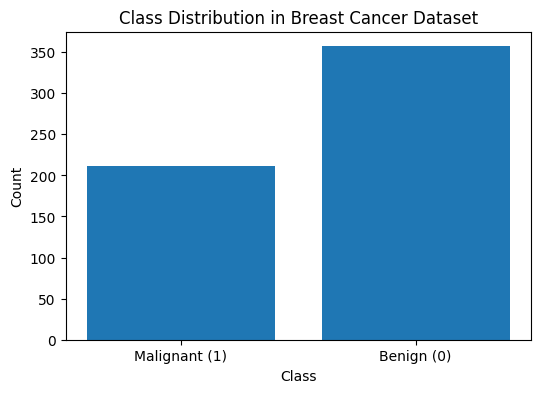

In [ ]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Count the number of samples in each class
class_counts = y.value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Breast Cancer Dataset')
plt.xticks(ticks=class_counts.index, labels=['Benign (0)', 'Malignant (1)'])
plt.show()


In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform undersampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Perform oversampling using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Perform oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train and evaluate logistic regression model on original data
print("Original Data")
clf_original = LogisticRegression(random_state=42)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
print(classification_report(y_test, y_pred_original))

# Train and evaluate logistic regression model on undersampled data
print("Undersampled Data")
clf_rus = LogisticRegression(random_state=42)
clf_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = clf_rus.predict(X_test)
print(classification_report(y_test, y_pred_rus))

# Train and evaluate logistic regression model on oversampled data
print("Oversampled Data")
clf_ros = LogisticRegression(random_state=42)
clf_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = clf_ros.predict(X_test)
print(classification_report(y_test, y_pred_ros))

# Train and evaluate logistic regression model on SMOTE-sampled data
print("SMOTE-sampled Data")
clf_smote = LogisticRegression(random_state=42)
clf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = clf_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))


Original Data
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Undersampled Data


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Oversampled Data
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

SMOTE-sampled Data
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97     

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che